# Here I want to merge together the data from different sources
# TODO 
## impute mean value 
## calc percentage of nan per gene. 
## drop biomarkers for values with Nan
# this reduces the genes to about /2 

In [1]:

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import seaborn as sns
from utils.helper import manhattanplot, violinplot_overall, scatter_plot, get_negative_values, METADATA_COLS


    # TODO 
## impute mean value 
## calc percentage of nan per gene. 
## drop biomarkers for values with Nan
# this reduces the genes to about /2 

## Step 1 10k immu

In [2]:
whole_blood_common = pd.read_csv('whole_blood/whole_blood_combi_common_columns.csv', index_col=0)
print(get_negative_values(whole_blood_common))
whole_blood_common.head()

/tmp/ipykernel_352432/1460166263.py:1: DtypeWarning: Columns (2,3,4,9) have mixed types. Specify dtype option on import or set low_memory=False.
  whole_blood_common = pd.read_csv('whole_blood/whole_blood_combi_common_columns.csv', index_col=0)


Empty DataFrame
Columns: [count, mean, std, min, 25%, 50%, 75%, max]
Index: []


,age,study_accession,gender,subject_accession,METHOD,TYPE,PLATFORM_DESCRIPTION,PLATFORM_GEO_ID,data_accession,TPRKB,NRAS,RBP7,GGA2,HLA-DQB1,PUS7,ELF2,ZMYND10,NEIL1,SETD1B,DHDDS,BCCIP,ABHD6,SH3BGRL,AGBL5,LNX2,MAPK11,S100A12,BMS1,WBP1,DNTTIP1,PPIL3,FBL,IL18R1,RPL18A,EIF4E3,IL18,MAP2K2,MAPKAPK3,ZNF320,PAIP1,...,PTCH1,PGPEP1,PSPH,GTF3C1,KAT2B,E2F4,RRP9,ABTB1,FBXW9,ZDHHC12,NSMCE2,FITM1,SLC16A10,RTN2,C2orf88,LONRF3,MANEA,KCNMB1,BRF2,C12orf43,CD320,ADNP,ZNF195,SNX12,KPTN,TTC27,ESYT1,RAMP1,VDAC3,DIABLO,STX10,KLF10,SUN1,BAIAP2,BTF3L4,MKNK1,ZNF593,SPICE1,MYOF,GLG1
0,63.9,SDY111,male,SUB116437,array,whole_blood,Illumina HumanHT-12 V4.0 expression beadchip,GPL10558,GSM2300358,6.778410,6.655208,6.950304,7.350000,7.088419,6.880592,6.772123,6.492413,6.693911,6.842131,7.109275,6.980447,6.796534,7.630130,6.508271,6.802463,6.646016,7.457354,7.136703,7.529559,8.043507,6.695261,8.262275,6.955282,12.591012,7.801700,13.135143,7.691334,9.940326,6.824865,6.584560,...,6.570959,6.512519,6.553589,7.004151,7.353162,8.007854,6.582985,9.861666,7.001123,7.487583,6.545801,6.837973,6.539064,6.591771,6.811856,6.523110,6.605156,6.948183,6.905040,6.713654,6.932028,7.014313,6.965561,6.516762,6.575351,7.053265,8.906308,6.472683,9.137538,7.058153,8.306608,6.774931,7.010768,6.547326,7.299028,7.210333,7.160045,6.775539,6.748138,8.605004
1,63.9,SDY111,male,SUB116437,array,whole_blood,Illumina HumanHT-12 V4.0 expression beadchip,GPL10558,GSM2300366,6.778410,6.655208,6.950304,7.350000,7.088419,6.880592,6.772123,6.492413,6.693911,6.842131,7.109275,6.980447,6.796534,7.630130,6.508271,6.802463,6.646016,7.457354,7.136703,7.529559,8.043507,6.695261,8.262275,6.955282,12.591012,7.801700,13.135143,7.691334,9.940326,6.824865,6.584560,...,6.570959,6.512519,6.553589,7.004151,7.353162,8.007854,6.582985,9.861666,7.001123,7.487583,6.545801,6.837973,6.539064,6.591771,6.811856,6.523110,6.605156,6.948183,6.905040,6.713654,6.932028,7.014313,6.965561,6.516762,6.575351,7.053265,8.906308,6.472683,9.137538,7.058153,8.306608,6.774931,7.010768,6.547326,7.299028,7.210333,7.160045,6.775539,6.748138,8.605004
2,64.2,SDY111,female,SUB116438,array,whole_blood,Illumina HumanHT-12 V4.0 expression beadchip,GPL10558,GSM2300371,6.651862,6.634236,7.092664,7.098224,7.672628,6.950897,6.614718,6.471389,6.740043,6.923494,7.229594,6.828012,7.000895,7.806053,6.723495,6.719521,6.784255,7.899827,7.143083,8.383760,8.627180,6.692713,8.153589,6.783978,12.353435,7.842624,12.931084,8.133612,10.000633,6.813327,6.597505,...,6.505276,6.530539,6.499017,6.686151,7.459517,8.243509,6.599576,9.508946,7.010025,7.199862,6.539442,6.711726,6.523150,6.646177,7.006890,6.540986,6.518297,7.102618,7.090561,6.675590,6.524129,6.978265,6.683030,6.542305,6.681944,6.777571,8.815252,6.431810,8.718930,6.782459,8.522078,6.664331,6.659918,6.651162,6.991041,7.350101,7.326576,7.705432,6.986961,8.591736
3,64.2,SDY111,female,SUB116438,array,whole_blood,Illumina HumanHT-12 V4.0 expression beadchip,GPL10558,GSM2300363,6.651862,6.634236,7.092664,7.098224,7.672628,6.950897,6.614718,6.471389,6.740043,6.923494,7.229594,6.828012,7.000895,7.806053,6.723495,6.719521,6.784255,7.899827,7.143083,8.383760,8.627180,6.692713,8.153589,6.783978,12.353435,7.842624,12.931084,8.133612,10.000633,6.813327,6.597505,...,6.505276,6.530539,6.499017,6.686151,7.459517,8.243509,6.599576,9.508946,7.010025,7.199862,6.539442,6.711726,6.523150,6.646177,7.006890,6.540986,6.518297,7.102618,7.090561,6.675590,6.524129,6.978265,6.683030,6.542305,6.681944,6.777571,8.815252,6.431810,8.718930,6.782459,8.522078,6.664331,6.659918,6.651162,6.991041,7.350101,7.326576,7.705432,6.986961,8.591736
4,68.9,SDY111,female,SUB116439,array,whole_blood,Illumina HumanHT-12 V4.0 expression beadchip,GPL10558,GSM2300374,6.652530,6.610226,7.145989,7.043411,7.872130,6.832618,6.644932,6.425446,6.630982,7.142563,7.000007,6.861198,6.715673,7.717301,6.543626,6.708976,6.784647,8.493619,7.046994,8.646582,7.908384,6.955048,8.401951,7.045913,12.497268,8.067211,12.715776,7.677614,9.960290,6.800216,6.559796,...,6.4290

In [3]:
pbmc_common = pd.read_csv('pbmc/combi_df_pbmc_common_cols.csv', index_col=0)
print(pbmc_common.shape)
print(get_negative_values(pbmc_common))
pbmc_common.head()


/tmp/ipykernel_352432/1784003809.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  pbmc_common = pd.read_csv('pbmc/combi_df_pbmc_common_cols.csv', index_col=0)


(335, 16151)
        count         mean          std  ...        50%          75%          max
PLAC9   335.0    13.955993    13.102419  ...   6.593561    20.000000    74.000000
MICA    335.0   632.368681   769.286657  ...   7.686720  1237.500000  2952.000000
PNPT1   335.0   978.199783  1132.273831  ...  11.248308  2106.000000  4517.000000
IFNW1   335.0     3.879469     2.309287  ...   3.802845     6.511127    10.593928
AWAT1   335.0     3.140966     2.680148  ...   3.000000     6.366698    12.773306
...       ...          ...          ...  ...        ...          ...          ...
LSM10   335.0  1661.733666  2031.225840  ...   9.499400  3452.500000  7849.000000
FZD2    335.0   268.813290   392.067894  ...   7.488542   445.500000  1961.000000
CHRND   335.0     3.853783     2.495747  ...   3.519173     6.419352    13.000000
DYRK1B  335.0  1141.123111  1358.752859  ...   7.139600  2552.000000  5028.000000
RBFOX3  335.0    26.786882    37.022120  ...   6.617514    39.000000   285.000000

[5

,age,study_accession,gender,subject_accession,METHOD,TYPE,PLATFORM_DESCRIPTION,PLATFORM_GEO_ID,data_accession,ZNF517,PLAC9,HAND2,MICA,CDCP1,PNPLA1,PNPT1,IFNW1,C6orf52,IGF1R,ZNF326,AWAT1,CNP,TRIM10,CYP4F8,GFRA4,RNF19A,OSBPL9,BYSL,STX4,DNASE1L1,SLC46A2,ZNF585A,SNAPIN,AMZ1,FLT1,PITPNA,SIK1,CDK2,IL17C,CDK17,...,PPARA,ORC2,SNTN,HLA-DMA,MRPS6,HPYR1,TDRD3,WDR70,TSPAN15,ZNF30,TM2D3,BRF2,DECR1,MAT2A,OR4N4,NBEAL2,GABPB1,CCNB2,NUP210L,RIN2,CA9,CDCA3,ALG14,DUSP2,CLDN6,CTXN3,LSM10,POLDIP3,MAX,FZD2,CHRND,ALAS2,TUSC3,STC2,ZNF23,CDKN2B,SNX10,TM4SF18,DYRK1B,RBFOX3
0,26.0,SDY269,male,SUB112829,array,pbmc,[HT_HG-U133_Plus_PM] Affymetrix HT HG-U133+ PM...,GPL13158,GSM733843,3.599545,3.663782,3.483372,4.031581,3.606176,3.632858,5.360660,3.661935,3.329257,4.063399,4.859976,3.270043,4.105623,3.472601,3.481927,3.545073,7.023702,5.037079,3.622354,3.896192,5.218862,3.577458,3.528318,5.158566,4.254317,3.709088,6.048526,6.290595,3.576760,4.420186,6.145979,...,3.647431,4.268158,3.259388,8.943059,6.424865,3.604277,3.769046,4.874077,3.860916,3.454872,7.371968,4.893961,7.475849,6.230094,3.732306,5.043468,5.186697,3.535090,3.309849,3.786126,4.138140,3.819645,3.592144,9.110556,3.603991,3.569219,6.138212,3.854549,6.183414,3.391851,3.554479,4.918226,3.675708,3.368919,4.150696,3.526192,8.069136,3.432507,3.773433,3.339224
1,40.0,SDY269,male,SUB112831,array,pbmc,[HT_HG-U133_Plus_PM] Affymetrix HT HG-U133+ PM...,GPL13158,GSM733852,3.801048,3.636847,3.426706,4.612067,3.483840,3.594570,5.585343,3.639907,3.687329,3.878299,4.858006,3.574326,3.921398,3.503315,3.622185,3.531261,7.522804,5.276032,3.322213,4.384265,4.979099,3.339902,3.841948,5.499727,3.930910,3.812187,5.238407,6.179698,3.973210,4.462488,6.286053,...,3.620337,4.774122,3.556771,8.207696,6.648877,3.445581,4.501285,4.561099,3.488972,3.832469,7.220867,4.342312,7.640184,5.652067,3.630277,4.759597,6.039545,3.488075,3.454606,3.770367,4.420554,3.802709,3.461843,8.433624,3.454311,3.279385,5.781619,3.808873,6.685945,3.989548,3.635489,5.772331,3.441598,3.453516,5.279789,3.524343,7.066381,3.443959,3.929056,3.677962
2,28.0,SDY269,female,SUB112836,array,pbmc,[HT_HG-U133_Plus_PM] Affymetrix HT HG-U133+ PM...,GPL13158,GSM733855,3.625211,3.766315,3.372229,4.343028,3.560053,3.199128,5.880629,3.448565,3.623391,4.591693,5.102337,3.333422,4.347986,3.460887,3.543852,3.351300,7.266719,5.479930,3.390602,3.978884,5.336491,3.836187,3.715588,5.441895,4.111628,3.603528,5.661560,6.190988,3.829962,4.469096,6.014996,...,3.593294,4.721457,3.227562,8.338963,6.683940,3.425625,4.416883,5.623789,3.536490,3.706300,7.372090,4.291429,7.967420,6.379780,3.498601,5.171290,5.712876,3.692652,3.170811,4.024731,4.188066,3.693763,3.707344,8.350717,3.572499,3.318604,6.184190,4.073634,6.573638,3.738457,3.489008,5.288885,3.245684,3.403299,4.648052,3.871679,8.172455,3.408233,3.937514,3.288126
3,39.0,SDY269,male,SUB112838,array,pbmc,[HT_HG-U133_Plus_PM] Affymetrix HT HG-U133+ PM...,GPL13158,GSM733858,3.631410,3.421422,3.610506,4.449865,3.726082,3.477533,5.219606,3.609183,3.409526,4.146642,4.841638,3.142349,4.148625,3.636226,3.617308,3.765033,7.433947,5.028212,3.320265,4.282690,5.074112,3.663344,3.558380,5.616287,4.116080,3.797670,6.079194,6.315479,3.594216,4.709411,6.042393,...,3.623256,4.884093,3.340665,8.573488,6.557253,3.865493,4.351177,4.535078,3.637452,3.829744,6.978745,4.290921,7.829840,5.952562,3.584264,5.270576,5.951605,3.540059,3.156745,3.778063,4.010277,3.552579,3.406726,9.074941,3.785567,3.378663,6.050847,4.042696,6.538414,3.825075,3.343559,4.940015,3.399281,3.386121,4.108815,3.632026,8.207862,3.637040,3.709359,3.232216
4,23.0,SDY269,female,SUB112839,array,pbmc,[HT_HG-U133_Plus_PM] Affymetrix HT HG-U133+ PM...,GPL13158,GSM733861,3.600073,3.434000,3.440501,4.548854,3.568449,3.294469,5.913850,3.797635,3.435163,4.254386,5.593277,3.391018,4.091720,3.507116,3.682936,3.362011,7.303971,5.415941,3.498460,4.183040,5.137966,3.671853,3.773882,5.374659,4.000126,3.605607,5.313764,5.752458,3.660601,4.497535,6.353176,...,3.657875,5.230252,3.176869,8.636193,6.3977

In [16]:
common_columns = whole_blood_common.columns.intersection(pbmc_common.columns)

combi_df_all = pd.concat([whole_blood_common, pbmc_common], ignore_index=True)
print(combi_df_all.shape)

### Remove possible duplicated subjects and entries with Nan 
combi_df_all_reduced = combi_df_all.drop_duplicates()
combi_df_all_reduced = combi_df_all_reduced.drop_duplicates(subset=['subject_accession'], keep='first')
print(combi_df_all_reduced.shape)

## drop entries that dont fullfill those min metadata
essential_columns = ['age', 'gender', 'subject_accession']
combi_df_all_reduced = combi_df_all_reduced.dropna(subset=essential_columns, axis=0, how='any')
print(combi_df_all_reduced.shape)

combi_df_all_reduced.head()

(1095, 16238)
(953, 16238)
(953, 16238)


,age,study_accession,gender,subject_accession,METHOD,TYPE,PLATFORM_DESCRIPTION,PLATFORM_GEO_ID,data_accession,CEP55,...,GUSBP5,BHLHE23,SHC4,GJB6,IYD,NPFF,B3GALNT1,B4GALT6,DACT2,ADCY10
0,63.9,SDY111,male,SUB116437,array,whole_blood,Illumina HumanHT-12 V4.0 expression beadchip,GPL10558,GSM2300358,6.567214,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,64.2,SDY111,female,SUB116438,array,whole_blood,Illumina HumanHT-12 V4.0 expression beadchip,GPL10558,GSM2300371,6.570620,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,68.9,SDY111,female,SUB116439,array,whole_blood,Illumina HumanHT-12 V4.0 expression beadchip,GPL10558,GSM2300374,6.567134,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,70.0,SDY111,male,SUB116440,array,whole_blood,Illumina HumanHT-12 V4.0 expression beadchip,GPL10558,GSM2300362,6.481273,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,66.1,SDY111,male,SUB116441,array,whole_blood,Illumina HumanHT-12 V4.0 expression beadchip,GPL10558,GSM2300359,6.599815,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
combi_df_all_reduced.describe()

/home/eliasschreiner/miniconda3/envs/merge_env/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/eliasschreiner/miniconda3/envs/merge_env/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/eliasschreiner/miniconda3/envs/merge_env/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/eliasschreiner/miniconda3/envs/merge_env/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/eliasschreiner/miniconda3/envs/merge_env/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepd

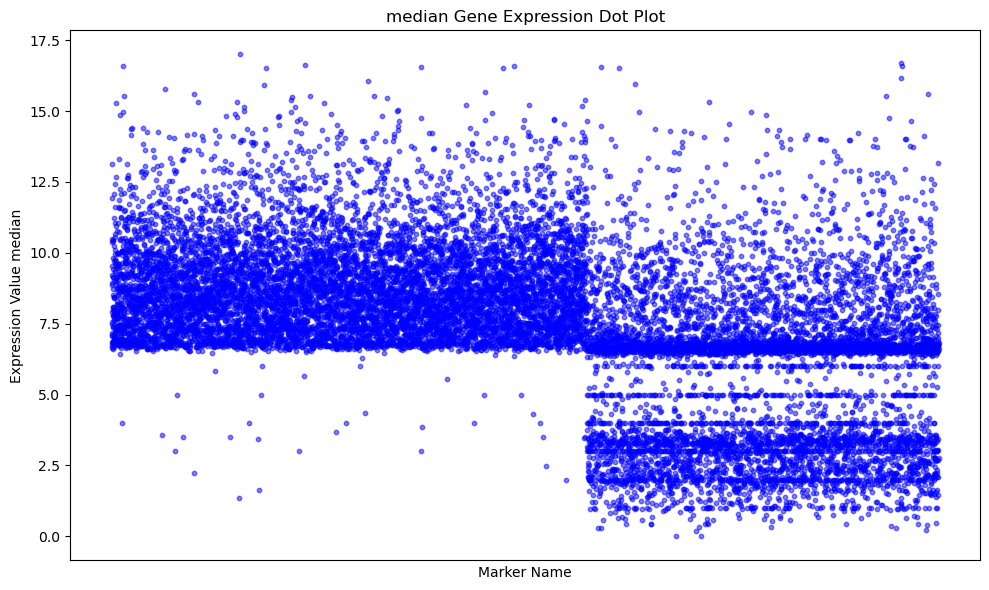

In [17]:
manhattanplot(combi_df_all[combi_df_all['TYPE']=='pbmc'], start_col=9)


In [18]:
combi_df_all_reduced.to_csv('10k_immu/combi_10k_all.csv')

In [19]:
no_meta_cols = list(set(common_columns) - set(METADATA_COLS))
print(len(no_meta_cols))
new_order_cols = METADATA_COLS + no_meta_cols
print(len(new_order_cols))

9232
9241


In [20]:
combi_df_common = combi_df_all_reduced[new_order_cols]
print(combi_df_common.shape)
combi_df_common.to_csv('10k_immu/combi_10k_common.csv')

(953, 9241)


In [30]:
# WHAT ????? negative AND max values that are waaaay too off .... 
combi_df_common.describe()

,age,TMEM186,DDX1,ZNF282,PSMC3IP,ZBTB25,TAF5L,FBXL15,ECI1,ATF7IP2,...,SH3PXD2A,SDCBP,MRTO4,TNPO1,PRR11,DDX3X,NSUN3,RAB2B,RAD51AP1,FRG1
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,...,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,35.176040,63.775617,931.771678,495.618822,15.187099,309.974991,622.969367,360.930546,357.081292,193.588979,...,384.016508,4918.753353,237.619796,1608.674893,260.938085,15461.954076,168.347366,276.325717,25.965094,368.481044
std,24.799394,150.912590,2192.386697,1183.473679,28.056938,738.616444,1469.179070,935.139602,873.499766,455.852153,...,921.013905,11976.758575,573.569139,3863.857631,625.905257,39406.290597,384.347411,634.971488,57.375111,861.515319
min,0.000000,0.069724,0.018890,-3.275650,0.000026,2.415019,-3.013182,-3.287558,-1.043878,0.271255,...,-0.361053,2.340583,-3.275650,-0.705127,0.904671,3.378609,-3.299661,-2.774224,0.003229,0.019301
25%,16.000000,3.016990,1.001656,5.371363,1.495837,4.894371,1.580927,3.678383,3.382770,4.293424,...,2.302981,8.019331,1.973972,0.897693,2.952423,6.463057,3.970277,3.403554,0.072424,1.271539
50%,25.000000,6.398895,7.769048,5.891715,4.466741,5.378003,4.521960,6.745831,6.989226,4.857296,...,5.355663,9.482843,5.764033,6.213648,4.086231,7.208977,6.024163,7.266618,3.404966,7.633715
75%,57.000000,7.699211,9.566838,6.904176,6.796056,7.902550,7.113926,8.249835,8.344498,7.440474,...,7.634158,11.886963,7.262431,7.589886,7.185583,8.578971,7.244117,9.943520,6.930982,9.092140
max,90.000000,968.000000,9738.000000,5282.000000,149.000000,4159.000000,5743.000000,10550.000000,5459.000000,2837.000000,...,4578.000000,58891.000000,4672.000000,16599.000000,3207.000000,214626.000000,1698.000000,2566.000000,344.000000,3752.000000


In [21]:
combi_df_common.head()

,age,study_accession,gender,subject_accession,METHOD,TYPE,PLATFORM_DESCRIPTION,PLATFORM_GEO_ID,data_accession,TMEM186,...,SH3PXD2A,SDCBP,MRTO4,TNPO1,PRR11,DDX3X,NSUN3,RAB2B,RAD51AP1,FRG1
0,63.9,SDY111,male,SUB116437,array,whole_blood,Illumina HumanHT-12 V4.0 expression beadchip,GPL10558,GSM2300358,6.955282,...,6.773528,9.536962,6.790515,7.132121,6.536593,7.660059,6.639310,8.441286,6.605876,7.415477
2,64.2,SDY111,female,SUB116438,array,whole_blood,Illumina HumanHT-12 V4.0 expression beadchip,GPL10558,GSM2300371,6.865222,...,6.560938,9.584771,6.630264,7.120727,6.551207,7.482569,6.981131,9.525551,6.643938,7.337555
4,68.9,SDY111,female,SUB116439,array,whole_blood,Illumina HumanHT-12 V4.0 expression beadchip,GPL10558,GSM2300374,6.833806,...,6.736703,9.677622,6.759087,6.942910,6.587618,7.582871,6.662981,9.462947,6.712256,7.448535
6,70.0,SDY111,male,SUB116440,array,whole_blood,Illumina HumanHT-12 V4.0 expression beadchip,GPL10558,GSM2300362,7.083681,...,6.760894,9.867361,6.723285,7.250428,6.588379,7.746340,6.726907,8.904339,6.572745,7.333239
8,66.1,SDY111,male,SUB116441,array,whole_blood,Illumina HumanHT-12 V4.0 expression beadchip,GPL10558,GSM2300359,6.846542,...,6.612137,9.888996,6.716033,7.075393,6.508031,7.659754,6.726356,9.424540,6.793494,7.342416


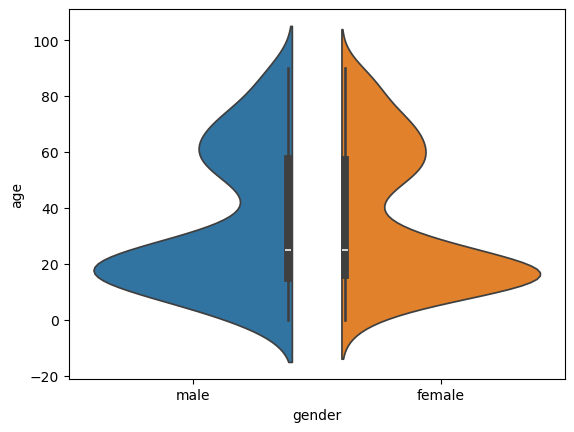

In [22]:
violinplot_overall(combi_df_common, x_topic='gender', y_topic='age', hue_split='gender', bin_name='10k_immu')

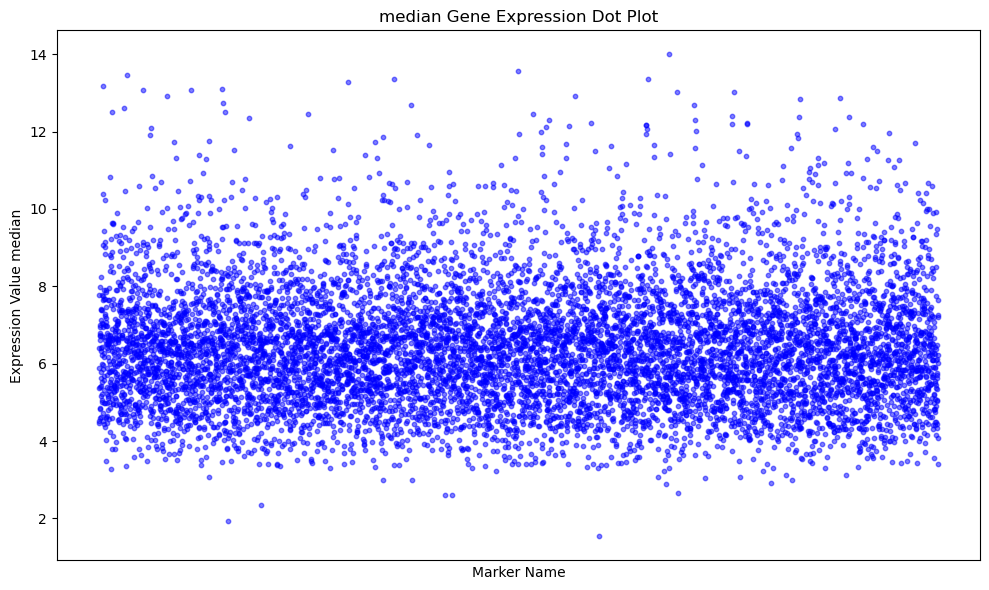

In [23]:
manhattanplot(combi_df_common, start_col=9, save_name='10k_immu/combi_10k_common')
### The plot looks okay, because the median per gene is probably corrected by the increased number of subjects

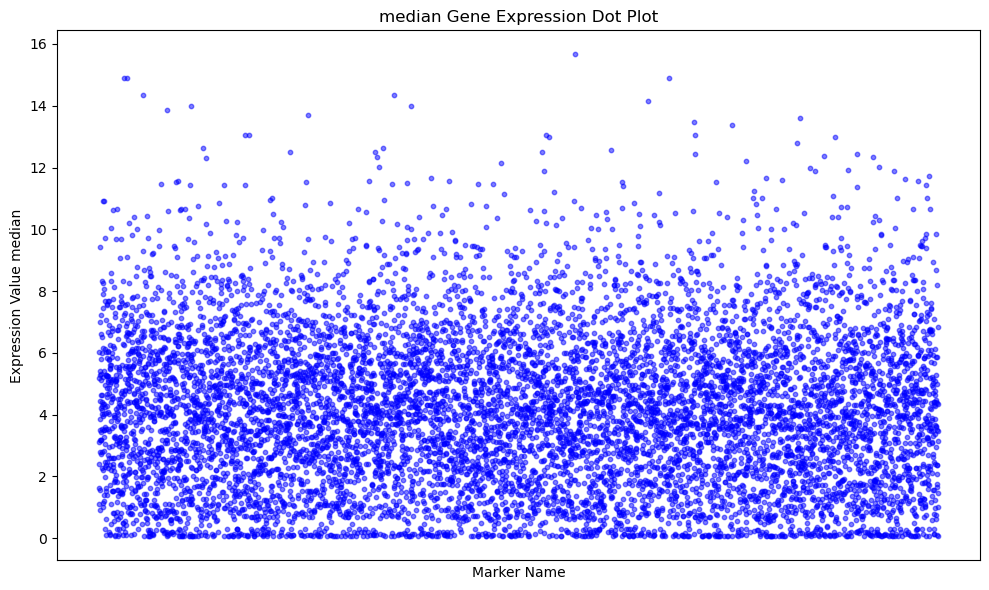

In [24]:
manhattanplot(combi_df_common[combi_df_common['METHOD']=='rnaseq'], start_col=9)


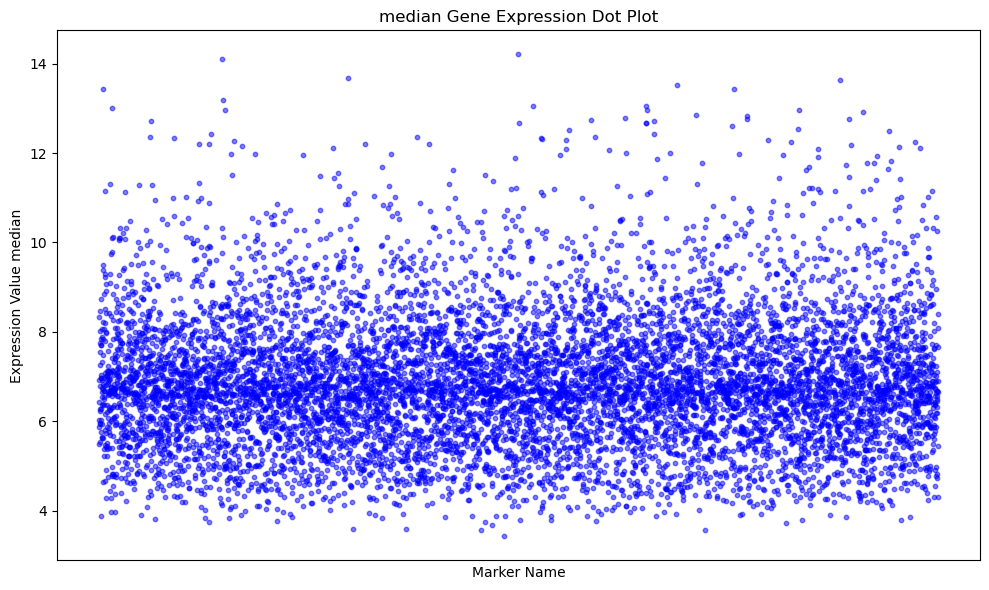

In [25]:
manhattanplot(combi_df_common[combi_df_common['METHOD']=='array'], start_col=9)


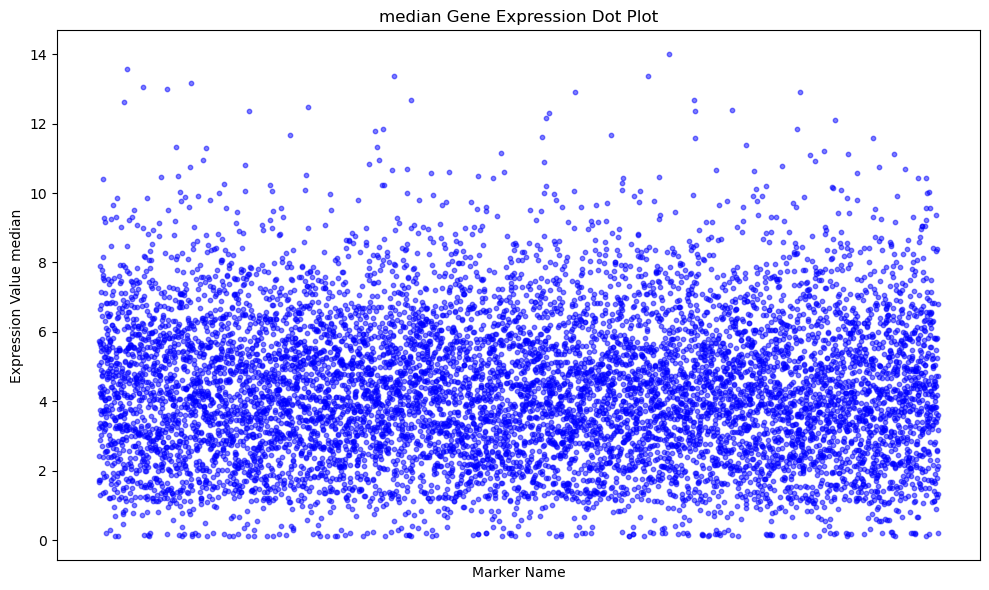

In [26]:
manhattanplot(combi_df_common[combi_df_common['TYPE']=='whole_blood'], start_col=9)


In [27]:
print(combi_df_common[combi_df_common['TYPE']=='pbmc'].shape)


(324, 9241)


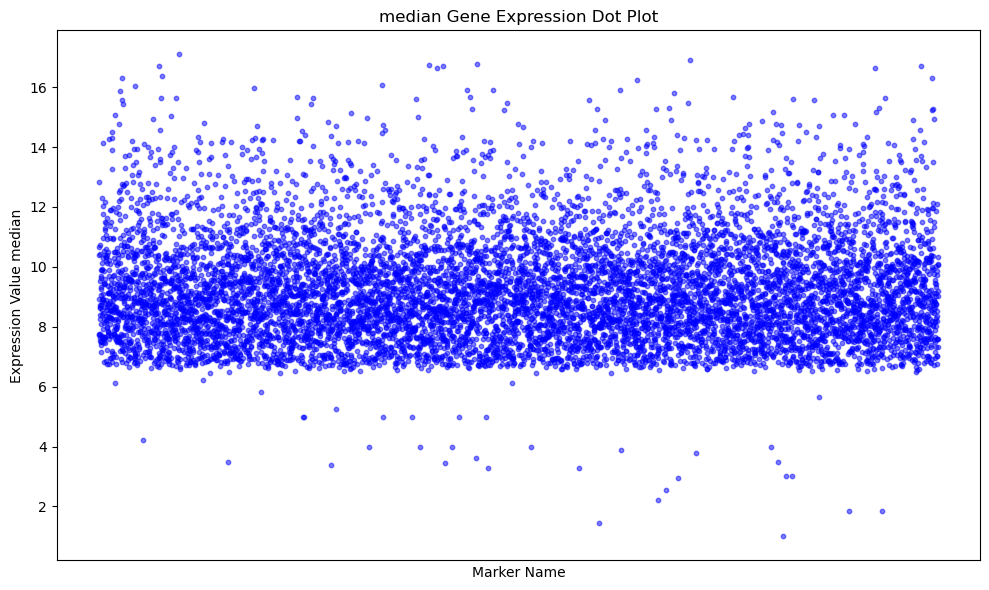

In [28]:
manhattanplot(combi_df_common[combi_df_common['TYPE']=='pbmc'], start_col=9)
